In [1]:
#########################
### import statements ###
#########################
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import pickle
import time
import matplotlib.animation as animation
from scipy.optimize import fsolve
import pdb
import multiprocessing
# import itertools

##############################
### global plot parameters ###
##############################
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'

Text(0.5, 1.0, 'HCB MDF $N=31$ $L$ Varies')

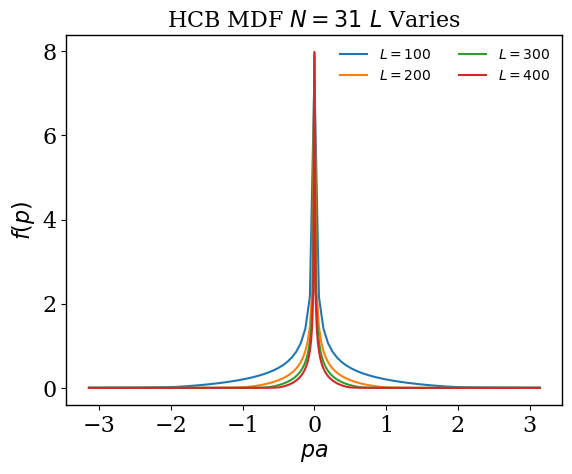

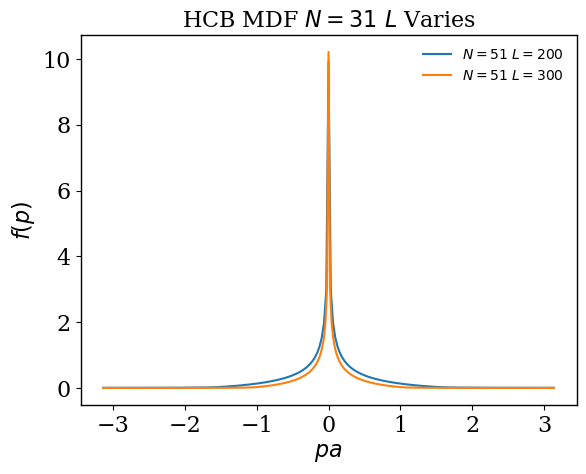

In [78]:
# plt.figure()
# plt.tight_layout()
# n31 = np.fromfile(r'C_T=0_Equilibrium\n_L=100_N=31_free_PBC.bin')
# n21 = np.fromfile(r'C_T=0_Equilibrium\n_L=100_N=21_free_PBC.bin')
# plt.plot(np.linspace(-np.pi,np.pi,101),n31,label='N=31')
# plt.plot(np.linspace(-np.pi,np.pi,101),n21,label='N=21')
# # plt.plot(np.linspace(0,99,100),n[50])
# plt.xlabel(r'$pa$',fontsize = 16)
# plt.ylabel(r'$f(p)$',fontsize = 16)
# plt.legend(ncols=2,frameon=False)
# plt.tick_params(labelsize=16)
# plt.title("HCB MDF $N$ Varies $L=100$",fontsize=16)

# plt.figure()
# plt.tight_layout()
# n21_100 = np.fromfile(r'C_T=0_Equilibrium\n_L=100_N=21_free_PBC.bin')
# n21_200 = np.fromfile(r'C_T=0_Equilibrium\n_L=200_N=21_free_PBC.bin')
# plt.plot(np.linspace(-np.pi,np.pi,101),n21_100,label='L=100')
# plt.plot(np.linspace(-np.pi,np.pi,101),n21_200,label='L=200')
# # plt.plot(np.linspace(0,99,100),n[50])
# plt.xlabel(r'$pa$',fontsize = 16)
# plt.ylabel(r'$f(p)$',fontsize = 16)
# plt.legend(ncols=2,frameon=False)
# plt.tick_params(labelsize=16)
# plt.title("HCB MDF $N=21$ $L$ Varies",fontsize=16)

# plt.figure()
# plt.tight_layout()
# n21_100 = np.fromfile(r'C_T=0_Equilibrium\n_L=100_N=21_free_PBC.bin')
# n21_200 = np.fromfile(r'C_T=0_Equilibrium\n_L=200_N=21_free_PBC.bin')
# n21_300 = np.fromfile(r'C_T=0_Equilibrium\n2_L=300_N=21_free_PBC.bin')
# plt.plot(np.linspace(-np.pi,np.pi,101),n21_100,label='L=100')
# plt.plot(np.linspace(-np.pi,np.pi,101),n21_200,label='L=200')
# plt.plot(np.linspace(-np.pi,np.pi,301),n21_300,label='L=300')
# plt.xlabel(r'$pa$',fontsize = 16)
# plt.ylabel(r'$f(p)$',fontsize = 16)
# plt.legend(ncols=2,frameon=False)
# plt.tick_params(labelsize=16)
# plt.title("HCB MDF $N=21$ $L$ Varies",fontsize=16)

plt.figure()
plt.tight_layout()
n31_100 = np.fromfile(r'C_T=0_Equilibrium\n_L=100_N=31_free_PBC.bin')
n31_200 = np.fromfile(r'C_T=0_Equilibrium\n_L=200_N=31_free_PBC.bin')
n31_300 = np.fromfile(r'C_T=0_Equilibrium\n_L=300_N=31_free_PBC_V2.bin')
n31_400 = np.fromfile(r'C_T=0_Equilibrium\n_L=400_N=31_free_PBC.bin')
plt.plot(np.linspace(-np.pi,np.pi,101),n31_100,label='$L=100$')
plt.plot(np.linspace(-np.pi,np.pi,201),n31_200,label='$L=200$')
plt.plot(np.linspace(-np.pi,np.pi,301),n31_300,label='$L=300$')
plt.plot(np.linspace(-np.pi,np.pi,401),n31_400,label='$L=400$')
plt.xlabel(r'$pa$',fontsize = 16)
plt.ylabel(r'$f(p)$',fontsize = 16)
plt.legend(ncols=2,frameon=False)
plt.tick_params(labelsize=16)
plt.title("HCB MDF $N=31$ $L$ Varies",fontsize=16)


plt.figure()
plt.tight_layout()
n51_200 = np.fromfile(r'C_T=0_Equilibrium\n_L=200_N=51_free_PBC.bin')
n51_300 = np.fromfile(r'C_T=0_Equilibrium\n_L=300_N=51_free_PBC.bin')
n31_200 = np.fromfile(r'C_T=0_Equilibrium\n_L=200_N=31_free_PBC.bin')
plt.plot(np.linspace(-np.pi,np.pi,201),n51_200,label='$N=51$ $L=200$')
plt.plot(np.linspace(-np.pi,np.pi,301),n51_300,label='$N=51$ $L=300$')
# plt.plot(np.linspace(-np.pi,np.pi,201),n31_200,label='$N=31$ $L=200$')
plt.xlabel(r'$pa$',fontsize = 16)
plt.ylabel(r'$f(p)$',fontsize = 16)
plt.legend(frameon=False)
plt.tick_params(labelsize=16)
plt.title("HCB MDF $N=31$ $L$ Varies",fontsize=16)

In [79]:
#######################################################
### Rough Scaling of Correlation Matrix Calculation ###
#######################################################
# x = [100,110,120,130,140,150,160,170,180,190,200]
# t = [1.16,1.66,2.27,2.99,3.94,4.95,6.2,8.3,9.68,11.98,14.21]
# plt.plot(x,t,marker='.',linestyle='--',color='black')
# plt.ylabel('time (S)',fontsize=16)
# plt.xlabel('number of sites (L)',fontsize=16)
# plt.tick_params(labelsize=16)
# plt.yscale('linear')